In [ ]:
%run viz_common.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import FinanceDataReader as fdr
df = fdr.DataReader("251340","2010")

In [3]:
df.columns = ['open','high','low','close','volume', 'change']
df.tail()

,open,high,low,close,volume,change
Date,,,,,,
2019-04-15,6755,6805,6745,6775,11290638,0.001478
2019-04-16,6775,6840,6765,6765,10767874,-0.001476
2019-04-17,6765,6800,6750,6765,8016541,0.000000
2019-04-18,6780,6955,6780,6925,15110418,0.023651
2019-04-19,6890,6900,6830,6835,9371395,-0.012996


#기본 계수에 의한 백테

In [4]:
def strategy(d2, k=0.5):
    d = d2.copy()
    d.insert(len(d.columns), 'range', d['high']-d['low'])
    
    prev_range = d['range'].shift(1)
    sell_price = d['close'].shift(1)
    buy_price = round((d['open'] + prev_range * k)/5.0)*5
    bool = d['high'] >= buy_price
    bool = bool.astype(int)
    #print(bool)
    
    daily_profit = bool * ((sell_price - buy_price) / buy_price - 0.15/100)
    d['profit'] = np.nan
    k = len(d.columns) - 1
    d.iloc[0,k] = 1  #여기서 d['profit'][0]로 하면 SettingWithCopyWarning이 뜸
    for i in range(1,len(d['profit'])):
        d.iloc[i,k] = d.iloc[i-1,k] * (1 + daily_profit[i]) # 여기도
    d = d.dropna()
    resultdf = [d['profit'], daily_profit]
    return resultdf

In [5]:
import cagr_mdd as cm
from tqdm import tqdm_notebook as tn

cagr = []; mdd= []; index=[]

for i in tn(np.arange(0.1, 1.05, 0.05)):
    c, m = cm.result(strategy(df, i)[0])
    cagr.append(c); mdd.append(m); 
    index.append('*{}'.format(round(i*100)/100))
    
cagr2 = pd.Series(cagr, index=index)
mdd2 = pd.Series(mdd, index=index)

cagrMdd = pd.DataFrame({'CAGR':cagr2, 'MDD':mdd2})

In [9]:
cagrMdd

,CAGR,MDD
*0.1,-47.540175,464.549778
*0.15,-53.522732,681.298997
*0.2,-57.838183,914.713745
*0.25,-60.436552,1102.686711
*0.3,-62.027889,1242.310475
*0.35,-63.915419,1438.676527
*0.4,-65.199103,1594.299322
*0.45,-63.268955,1364.754484
*0.5,-63.942476,1437.905983
*0.55,-63.608137,1399.471604


Text(0.5, 1.0, 'test_range별 Cagr과 MDD')

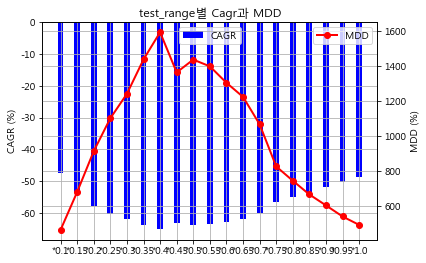

In [8]:
#이제 그래프!
plt.bar(cagrMdd.index,cagrMdd['CAGR'], 0.35, color='b', label = 'CAGR')
plt.ylabel('CAGR (%)')
plt.legend(loc='upper center')
plt.twinx()
plt.plot(cagrMdd.index, cagrMdd['MDD'], '-or', label='MDD')
plt.ylabel('MDD (%)')
plt.legend()
plt.title("test_range별 Cagr과 MDD")